In [13]:
import torch
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
import matplotlib as mpl
import os
import gc
import pandas as pd
import csv
from numpy import *
from datetime import date
import time
plt.rcParams['figure.dpi'] = 300
import builtins

In [14]:
amino_acid = np.array(['A', 'V', 'F', 'I', 'L','D','E','K','S','T','Y','C','N','Q', 'P','M', 'R', 'H', 'W', 'G'])
baseline = np.array([1, 2.9, 0, 3.9, 3.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
baseline = baseline/max(baseline)
print(baseline)
num_aa = len(amino_acid)
print(f'Total numnber of amino acids are {len(amino_acid)}')

[0.25641026 0.74358974 0.         1.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Total numnber of amino acids are 20


## Load the Importance, One-hot encoding and sequence length

In [15]:
ohe = np.load('./data/x_test.npy', allow_pickle=True)
seq_len = np.load('./data/len_test.npy', allow_pickle=True)
imp = np.load('./data/test_importance.npy', allow_pickle=True)
prop = np.load('./data/y_test.npy', allow_pickle=True)

In [16]:

dict_score = {}
for i in range(num_aa):
    dict_score[i] = []
    
score = np.zeros((len(amino_acid),))
count = np.zeros((len(amino_acid),))

N = ohe.shape[0]
for i in range(N):
    # if prop[i] != 0:
        l = int(seq_len[i])
        x = np.argmax(ohe[i,0:l,:],axis=-1)
        sample_imp = imp[i,0:l]/max(imp[i,0:l])
        for aa in range(num_aa):
            idx = (x==aa)
            score[aa] += np.sum(sample_imp[idx])
            count[aa] += np.sum(idx*1)
            mean_imp = (np.sum(sample_imp[idx])/(np.sum(idx*1)+1E-18))
            dict_score[aa].append(mean_imp)
    
    # else:
    #     print(prop[i])

score = score/count
score = (score-min(score))/(max(score)-min(score))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


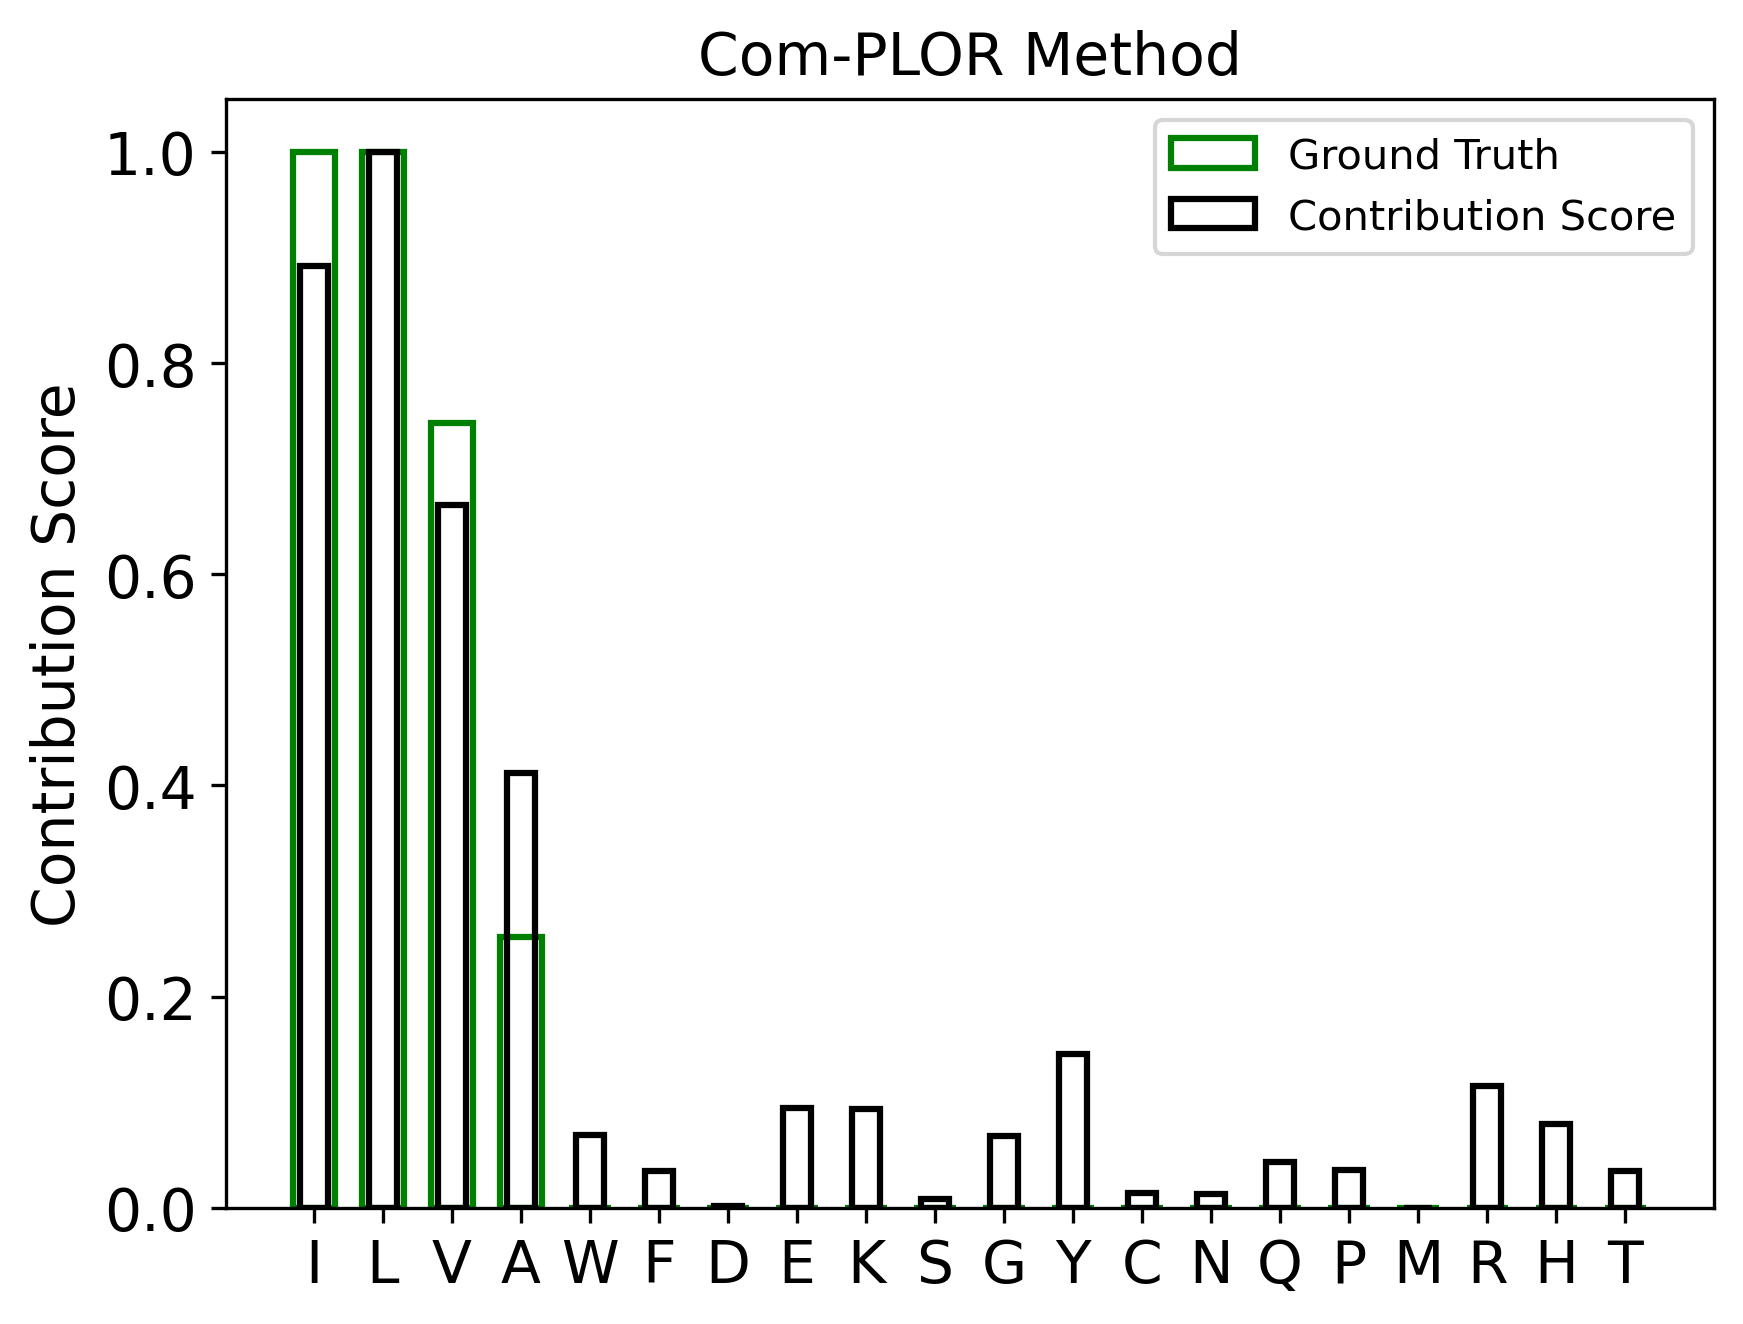

In [17]:
## descending_order
sorted_id = np.argsort(baseline)[::-1]

amino_acid = amino_acid[sorted_id]
baseline = baseline[sorted_id]
score = score[sorted_id]

# X positions for bars
x = np.arange(len(amino_acid))  # Base positions for amino acids
print(x)

# Plot the baseline scores with a larger width and outlined bars
plt.bar(x - 0.2, baseline, color='none', edgecolor='green', linewidth=1.5, width=0.6, label='Ground Truth')

# Plot the main scores on top with an offset to increase spacing
plt.bar(x - 0.2, score, color='none', edgecolor='black', linewidth=1.5, width=0.4, label='Contribution Score')

# Adding labels and title
plt.ylabel('Contribution Score', fontsize=14)
plt.title('Com-PLOR Method', fontsize=14)
plt.xticks(x-0.2, amino_acid, fontsize=14)  # Position x-ticks at original x positions
plt.yticks(fontsize=14)
plt.legend()

# Show plot
plt.show()

In [18]:
# dict_imp = []
# dict_std = []
# for i in range(num_aa):
#     dict_imp.append(np.mean(dict_score[i]))
#     dict_std.append(np.std(dict_score[i]))


# plt.bar(amino_acid, dict_imp)    
# # plt.errorbar(amino_acid, dict_imp, yerr=dict_std, fmt="o", color="r")